In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import DivisionGames,DivisionSets,RallyParsing, RallyParsing, RallyExtraction
from utils.Visuals import GetCourt
from utils.SeqMining import CallPrefixSpan,check_list_contained,SortPatterns,Seqmining,GetStrokes,Sequencer,find_contiguous_patterns,PatternsByStat
import numpy as np
import os
import csv
import warnings
from sportypy.surfaces.tennis import ATPCourt, TennisCourt

In [131]:
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [209]:
warnings.filterwarnings('ignore')
matches = pd.read_csv('BaseData/charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)
points = pd.read_csv('ProjData/Points.csv',encoding='unicode_escape',quoting=csv.QUOTE_NONE)

FedererGames = pd.read_csv('Federer_data/FedererMiddle.csv')

In [212]:
a = ['S','R']
FedererPoints = pd.read_csv('Federer_data/PointsFedererMiddle.csv')
FedererPoints = FedererPoints[~FedererPoints['1st'].isin(a)]

# Wins and Losses

In [213]:
FedererWins = FedererGames[FedererGames['Winner'] == True]
FedererLosses = FedererGames[FedererGames['Winner'] == False]

In [214]:
FedererPointsInWins = FedererPoints[FedererPoints['match_id'].isin(FedererWins['match_id'])]
FedererPointsInLosses = FedererPoints[FedererPoints['match_id'].isin(FedererLosses['match_id'])]

In [215]:
FedererPointsWonInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == True]
FedererPointsLostInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == False]

In [262]:
def Stats(Points,Matches,surface= None,result=None,pt_results= None,serve =None):
    
    if result != None:
        Matches = Matches[Matches['Winner'] == result]
    if surface != None:
        Matches = Matches[Matches['Surface'] == surface]

    data = Points[Points['match_id'].isin(Matches['match_id'])]

    if pt_results != None:
        data = data[data['Victor'] == pt_results]
    
    if serve != None:
        data = data[data['Server'] == serve]

    WinRate = round(data['Winner'].value_counts(normalize=True),4)
    AceRate = round(data['Ace'].value_counts(normalize=True),4)
    DoubleFRate = round(data['Double Fault'].value_counts(normalize=True),4)
    FERate = round(data['Forced Error'].value_counts(normalize=True),4)
    UFERate = round(data['Unforced Error'].value_counts(normalize=True),4)
    print(f'Aces => {float(AceRate[True])}')
    print(f'Winners => {float(WinRate[True])}')
    print(f'Forced Errors => {float(FERate[True])}')
    print(f'Unforced Errors => {float(UFERate[True])}')
    print(f'Double Faults => {float(DoubleFRate[True])} \n')
    return [float(WinRate[True]),float(AceRate[True]),float(DoubleFRate[True]),float(FERate[True]),float(UFERate[True])]

In [220]:
PointTypees = ['Winner','Ace','Double Fault','Forced Error','Unforced Error']

In [263]:
print('Percentages of Points: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,pt_results=True)]


Percentages of Points: 
 --------------------------------------------
Aces => 0.0836
Winners => 0.259
Forced Errors => 0.3524
Unforced Errors => 0.2749
Double Faults => 0.0301 



In [264]:
print('Percentages of Points in Wins: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,result=True,pt_results=True)]

print('Percentages of Points in Losses: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,result=False,pt_results=True)]

Percentages of Points in Wins: 
 --------------------------------------------
Aces => 0.0846
Winners => 0.2581
Forced Errors => 0.3453
Unforced Errors => 0.2801
Double Faults => 0.0319 

Percentages of Points in Losses: 
 --------------------------------------------
Aces => 0.0815
Winners => 0.2611
Forced Errors => 0.3676
Unforced Errors => 0.2636
Double Faults => 0.0263 



In [265]:
print('Percentages of Points in Wins on Grass: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Grass',result=True,pt_results=True)]

print('Percentages of Points in Losses on Grass: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Grass',result=False,pt_results=True)]

print('Percentages of Points in Wins on Hard: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Hard',result=True,pt_results=True)]

print('Percentages of Points in Losses on Hard: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Hard',result=False,pt_results=True)]

print('Percentages of Points in Wins on Clay: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Clay',result=True,pt_results=True)]

print('Percentages of Points in Losses on Clay: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Clay',result=False,pt_results=True)]

Percentages of Points in Wins on Grass: 
 --------------------------------------------
Aces => 0.0903
Winners => 0.2768
Forced Errors => 0.3715
Unforced Errors => 0.2383
Double Faults => 0.0231 

Percentages of Points in Losses on Grass: 
 --------------------------------------------
Aces => 0.1136
Winners => 0.2559
Forced Errors => 0.393
Unforced Errors => 0.218
Double Faults => 0.0196 

Percentages of Points in Wins on Hard: 
 --------------------------------------------
Aces => 0.0858
Winners => 0.2496
Forced Errors => 0.3388
Unforced Errors => 0.2911
Double Faults => 0.0347 

Percentages of Points in Losses on Hard: 
 --------------------------------------------
Aces => 0.0775
Winners => 0.2586
Forced Errors => 0.3642
Unforced Errors => 0.2696
Double Faults => 0.0302 

Percentages of Points in Wins on Clay: 
 --------------------------------------------
Aces => 0.0751
Winners => 0.2677
Forced Errors => 0.3406
Unforced Errors => 0.2855
Double Faults => 0.0312 

Percentages of Points

In [226]:
def PlotGraph(data,surface, columns, won):

    Won = data[0]
    Lost = data[1]
    barWidth = 0.25
    
    plt.subplots(figsize =(8, 4))
    br1 = np.arange(len(Won)) 
    br2 = [x + barWidth for x in br1] 
    plt.bar(br1, Won, color= 'blue', alpha = 0.7,
            width = barWidth)
    plt.bar(br2, Lost, color= 'red', alpha = 0.7,
            width = barWidth)
    
    plt.xticks([r + barWidth for r in range(len(columns))], 
            columns)

    
    plt.ylabel("Percentages")
    plt.title(f"Result of Points for Federer in Games {won}")
    plt.legend(['Won','Lost'])

    plt.show()

In [227]:
# PlotGraph(data,'cl',PointTypees,'Won')

# Saques e Recepções

In [228]:
FedererServesPoints = FedererPoints[FedererPoints['Server'] == True]
FedererReceptionPoints = FedererPoints[FedererPoints['Server'] == False]

FedererServesW = FedererServesPoints[FedererServesPoints['Victor'] == True]
FedererServesL = FedererServesPoints[FedererServesPoints['Victor'] == False]

FedererReceptionW= FedererReceptionPoints[FedererReceptionPoints['Victor'] == True]
FedererReceptionL= FedererReceptionPoints[FedererReceptionPoints['Victor'] == False]

# Games e Sets Stats

In [229]:
FedererServePointsGameW = FedererServesPoints[FedererServesPoints['GameWinner'] == True]
FedererServePointsGameL = FedererServesPoints[FedererServesPoints['GameWinner'] == False]

FedererServePointsSetW = FedererServesPoints[FedererServesPoints['SetWinner'] == True]
FedererServePointsSetL = FedererServesPoints[FedererServesPoints['SetWinner'] == False]

FedererReceptionPointsGameW = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == True]
FedererReceptionPointsGameL = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == False]

FedererReceptionPointsSetW = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == True]
FedererReceptionPointsSetL = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == False]

In [230]:
SetDict = DivisionSets(FedererPoints,FedererPoints['match_id'].unique())

In [231]:
def MeanPoints(division):
    Mean = 0
    Divisions = []
    num_divisions = 0
    for k in division.keys():
        divisions = 0
        Match = division[k]
        divisions = len(Match)
        num_divisions += divisions

        for d in Match:
            Mean += len(d)
        
        Divisions.append(divisions)
    
    return (Mean/num_divisions, Divisions)

# Visualizações

In [232]:
court = GetCourt('Grass')

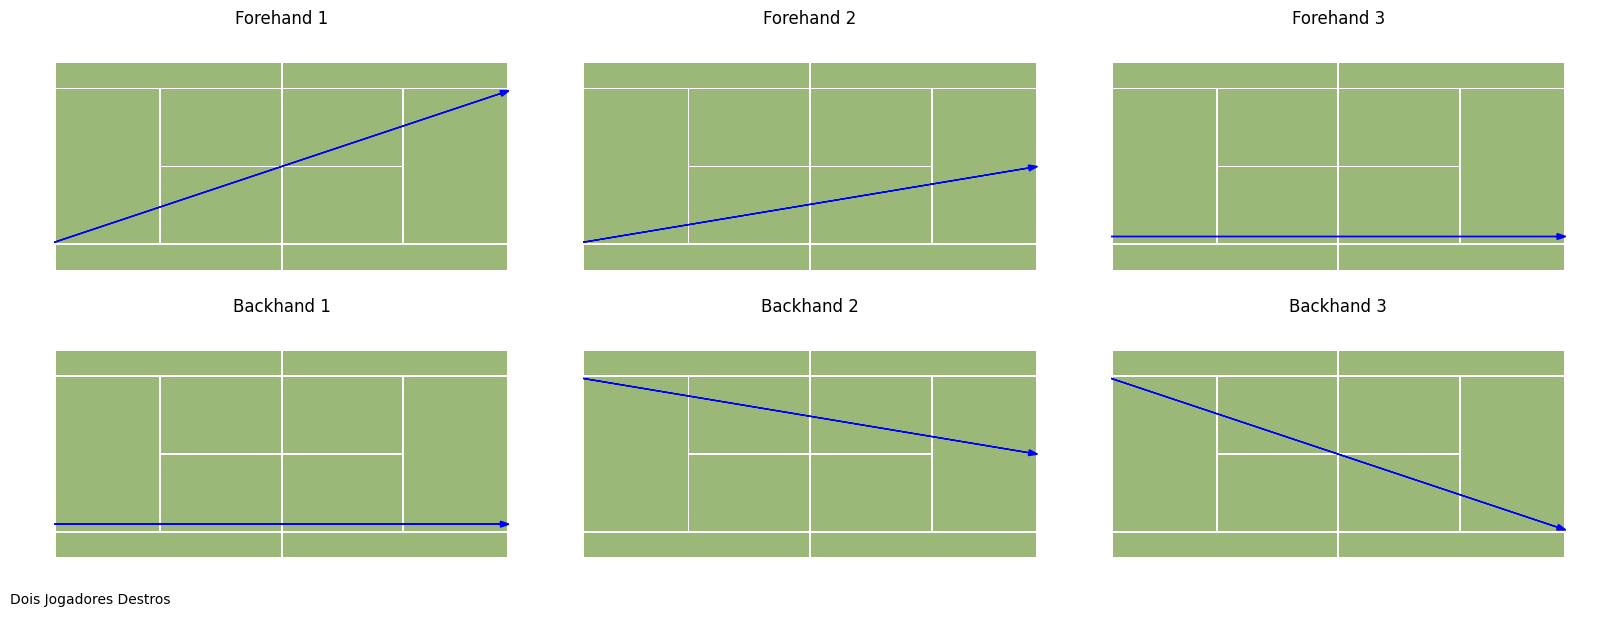

In [233]:
fig, ax = plt.subplots(figsize=(16,6),nrows=(2),ncols=(3))

ax[0][0].set_title('Forehand 1')
ax[0][1].set_title('Forehand 2')
ax[0][2].set_title('Forehand 3')
court.draw(ax=ax[0][0],display_range='full')
court.draw(ax=ax[0][1],display_range='full')
court.draw(ax=ax[0][2],display_range='full')
court.arrow(ax=ax[0][0],x1= -39.0, y1= -13.0, x2=39.0, y2=13.0,color= 'blue')
court.arrow(ax=ax[0][1],x1= -39.0, y1= -13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[0][2],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')

ax[1][0].set_title('Backhand 1')
ax[1][1].set_title('Backhand 2')
ax[1][2].set_title('Backhand 3')
court.draw(ax=ax[1][0],display_range='full')
court.draw(ax=ax[1][1],display_range='full')
court.draw(ax=ax[1][2],display_range='full')
court.arrow(ax=ax[1][0],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')
court.arrow(ax=ax[1][1],x1= -39.0, y1= 13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[1][2],x1= -39.0, y1= 13.0, x2=39.0, y2=-13.0,color= 'blue')

axes = ax.ravel()

fig.tight_layout()
fig.text(s='Dois Jogadores Destros',y=0.0,x=0.0)
plt.show()

In [234]:
Sequences, Endings = Sequencer(FedererServePointsGameW)
Patterns = CallPrefixSpan(Sequences, 100, k=5)
SortedPatterns = SortPatterns(Patterns)
contiguous_patterns = find_contiguous_patterns(Sequences,30,k=5)
SortedContiguousPatterns = SortPatterns(contiguous_patterns)

In [235]:
WinnerPatterns = PatternsByStat('Winner',FedererServesW,20,4)

In [236]:
FEPatterns = PatternsByStat('Forced Error',FedererPointsInWins,50,4)

In [237]:
FEPatterns

[(54,
  ('Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo'))]

# Stats

In [238]:
# Create a function that returns these Stats divided by Start/ Middle/ End

In [239]:
KP = pd.read_csv('BaseData/charting-m-stats-KeyPointsServe.csv')
RallySize = pd.read_csv('BaseData/charting-m-stats-Rally.csv')

In [240]:
rowsServe = ['Total','1-3','4-6','7-9','10']
rowsIndx = ['match_id','1-3','4-6','7-9','10-']
    
PlayerRallyServe = RallySize[RallySize['server'] == 'Roger Federer'].drop(columns=['server','returner'])
PlayerRallyServe = PlayerRallyServe[PlayerRallyServe['match_id'].isin(FedererGames['match_id'].unique())]
PlayerRallyServe = PlayerRallyServe[~PlayerRallyServe['row'].isin(rowsServe)]
PlayerRallyServe[['pl1_unforced','pl2_unforced']] = PlayerRallyServe[['pl2_unforced','pl1_unforced']]


In [241]:
#pl1 actually means server, and pl2 actually means receiver

In [242]:
RallySmall = PlayerRallyServe[(PlayerRallyServe['row'] == '1-3-1') | (PlayerRallyServe['row'] == '1-3-2')]
RallyMedium = PlayerRallyServe[(PlayerRallyServe['row'] == '4-6-1') | (PlayerRallyServe['row'] == '4-6-2')]
RallyBig = PlayerRallyServe[(PlayerRallyServe['row'] == '7-9-1') | (PlayerRallyServe['row'] == '7-9-2')]
RallyOver = PlayerRallyServe[(PlayerRallyServe['row'] == '10-1') | (PlayerRallyServe['row'] == '10-2')]

In [243]:
RallyOver.sum()

match_id        20151122-M-Tour_Finals-F-Roger_Federer-Novak_D...
row             10-110-110-110-110-210-210-210-110-110-210-110...
pts                                                           902
pl1_won                                                       393
pl1_winners                                                   143
pl1_forced                                                     95
pl1_unforced                                                  155
pl2_won                                                       509
pl2_winners                                                   147
pl2_forced                                                    132
pl2_unforced                                                  227
dtype: object

In [244]:
rowsReturn = ['Total','1-3','4-6','7-9','10']
rowsIndx = ['match_id','1-3','4-6','7-9','10-']
    
PlayerRallyReturn = RallySize[RallySize['returner'] == 'Roger Federer'].drop(columns=['server','returner'])
PlayerRallyReturn = PlayerRallyReturn[PlayerRallyReturn['match_id'].isin(FedererWins['match_id'].unique())]
PlayerRallyReturn = PlayerRallyReturn[~PlayerRallyReturn['row'].isin(rowsReturn)]
PlayerRallyReturn[['pl1_unforced','pl2_unforced']] = PlayerRallyReturn[['pl2_unforced','pl1_unforced']]

In [245]:
RallySmall = PlayerRallyReturn[(PlayerRallyReturn['row'] == '1-3-1') | (PlayerRallyReturn['row'] == '1-3-2')]
RallyMedium = PlayerRallyReturn[(PlayerRallyReturn['row'] == '4-6-1') | (PlayerRallyReturn['row'] == '4-6-2')]
RallyBig = PlayerRallyReturn[(PlayerRallyReturn['row'] == '7-9-1') | (PlayerRallyReturn['row'] == '7-9-2')]
RallyOver = PlayerRallyReturn[(PlayerRallyReturn['row'] == '10-1') | (PlayerRallyReturn['row'] == '10-2')]

In [246]:
RallySmall.sum()

match_id        20151121-M-Tour_Finals-SF-Roger_Federer-Stan_W...
row             1-3-21-3-21-3-21-3-11-3-11-3-11-3-21-3-21-3-11...
pts                                                          5054
pl1_won                                                      3690
pl1_winners                                                  1047
pl1_forced                                                   1836
pl1_unforced                                                  808
pl2_won                                                      1364
pl2_winners                                                   133
pl2_forced                                                    254
pl2_unforced                                                  672
dtype: object

In [247]:
KP = KP[KP['match_id'].isin(FedererGames['match_id'])]
FKP = KP[KP['player'] == 'Roger Federer']
FKP = FKP.drop(columns='player')

In [248]:
FKP['row'].unique()

array(['BP', 'GP', 'Deuce', 'STotal'], dtype=object)

In [249]:
FKP_BP = FKP[FKP['row'] == 'BP'].drop(columns='row')
FKP_GP = FKP[FKP['row'] == 'GP'].drop(columns='row')
FKP_Deuce = FKP[FKP['row'] == 'Deuce'].drop(columns='row')

In [250]:
Aggregate_BP = FKP_BP.sum()
Aggregate_GP = FKP_GP.sum()
Aggregate_Deuce = FKP_Deuce.sum()

In [251]:
Won = Aggregate_BP['pts_won'] / Aggregate_BP['pts']
First = Aggregate_BP['first_in'] / Aggregate_BP['pts']

# *We can use these Stats in different scenarios: % in games won vs. games lost 
#                                                   #

In [252]:
Won

0.6542893725992317

In [253]:
Split = pd.read_csv('BaseData/charting-m-stats-SnV.csv')

In [254]:
Split['row'].unique()

array(['SnV', 'SnV1st', 'nonSnV', 'nonSnV1st', 'nonSnV2nd', 'SnV2nd'],
      dtype=object)

In [255]:
# Find the return patterns of a specific player
FedererReceptionRallys = RallyExtraction(FedererReceptionPoints)
Return = []
Outcomes = []
FedererReceptionRallys
for r in FedererReceptionRallys:
    Return.append(r[1:4])
    Outcomes.append(r[-1])

In [256]:
r

'6f28f2b2f1r1f3n@'

In [257]:
a = FedererGames[0:20]

In [258]:
dictionary = {}

In [259]:
ReturnDict = {
    '0' : 'Serve',
    '4' : 'Wide Serve',
    '5' : 'Body Serve',
    '6' : 'Down The T Serve',
    'f' : 'Forehand',
    'b' : 'Backhand',
    'r' : 'FH Slice',
    's' : 'BH Slice',
    'v' : 'FH Volley',
    'z' : 'BH Volley',
    '1' : ' Cruzado',
    '2' : ' Meio',
    '3' : ' Paralelo',
    '*' : 'Winner',
    '@' : 'Forced Error',
    '#' : 'Unforced Error',
    'o' :'standard overhead/smash',
    'p' :'backhand overhead/smash',
    'u' :'forehand drop shot',
    'y' :'backhand drop shot',
    'l' :'forehand lob',
    'm' :'backhand lob',
    'h' :'forehand half-volley',
    'i' :'backhand half-volley',
    'j' :'forehand swinging volley',
    'k' :'backhand swinging volley',
    'n' : 'net',
    'w' : 'wide' ,
    'd' : 'deep',
    'x' : 'both wide and deep',
    'g' : 'foot faults',
    't' : 'trick shot',
    'q' : 'unknown',
    'e' : 'any',
    '7' : 'shallow',
    '8' : 'mid',
    '9' : 'deep'
}

In [260]:
Errors = ['n','w','d','x']